In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch


In [2]:
def get_data():
    data_dir = 'C:\\Users\\pruth\\Desktop\\facial-recognition-image-classification\\data'

    train_set = datasets.ImageFolder(data_dir + '\\train')
    test_set = datasets.ImageFolder(data_dir + '\\validation')

    return train_set, test_set

In [3]:
def get_data():
    data_dir = 'C:\\Users\\pruth\\Desktop\\facial-recognition-image-classification\\data'
   
    transform = transforms.Compose([
        #transforms.RandomRotation(20),
        transforms.RandomResizedCrop(128),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor()])

    train_set = datasets.ImageFolder(data_dir + '\\train', transform=transform)
    test_set = datasets.ImageFolder(data_dir + '\\validation', transform=transform)

    train = DataLoader(train_set, batch_size=32, shuffle=True)
    test = DataLoader(test_set, batch_size=32, shuffle=True)

    return train, test

In [4]:
train, tests = get_data()

In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def train_imshow():
    classes = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise') # Defining the classes we have
    dataiter = iter(train)
    images, labels = next(dataiter)
    fig, axes = plt.subplots(figsize=(10, 4), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0)) 
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
    plt.show()

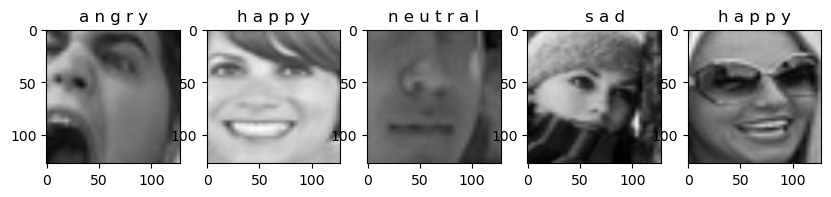

In [6]:
train_imshow()

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(8, 8)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

if torch.cuda.is_available():
    print("USING GPU")
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

model = net.to(device)
criterion = criterion.to(device)

def train_net(n_epoch):
    losses = []
    for epoch in range(n_epoch):
        running_loss = 0.0
        for i, data in enumerate(train, 0):
            inputs, labels = data
            inputs = inputs.to(device)  # Move batch data to the specified device
            labels = labels.to(device)  # Move labels to the specified device

            optimizer.zero_grad()
            outputs = model(inputs)  # Use the 'model' variable consistently
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            losses.append(loss.item())
            running_loss += loss.item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.10f' % (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    plt.plot(losses, label='Training loss')
    plt.show()
    print('Finished Training')


USING GPU


[1,   100] loss: 0.0926573784
[1,   200] loss: 0.0905700964
[1,   300] loss: 0.0905417185
[1,   400] loss: 0.0910686595
[1,   500] loss: 0.0904636434
[1,   600] loss: 0.0904304219
[1,   700] loss: 0.0905362810
[1,   800] loss: 0.0908185968
[1,   900] loss: 0.0908770098
[2,   100] loss: 0.0901790828
[2,   200] loss: 0.0903915899
[2,   300] loss: 0.0905062029
[2,   400] loss: 0.0901415225
[2,   500] loss: 0.0902901664
[2,   600] loss: 0.0900880606
[2,   700] loss: 0.0899759155
[2,   800] loss: 0.0896353071
[2,   900] loss: 0.0896072406
[3,   100] loss: 0.0891861877
[3,   200] loss: 0.0896823428
[3,   300] loss: 0.0896114679
[3,   400] loss: 0.0895298162
[3,   500] loss: 0.0894089773
[3,   600] loss: 0.0894806623
[3,   700] loss: 0.0902979562
[3,   800] loss: 0.0899336056
[3,   900] loss: 0.0893518078
[4,   100] loss: 0.0892730579
[4,   200] loss: 0.0896449878
[4,   300] loss: 0.0892006688
[4,   400] loss: 0.0885475518
[4,   500] loss: 0.0898571880
[4,   600] loss: 0.0895155790
[4,   700]

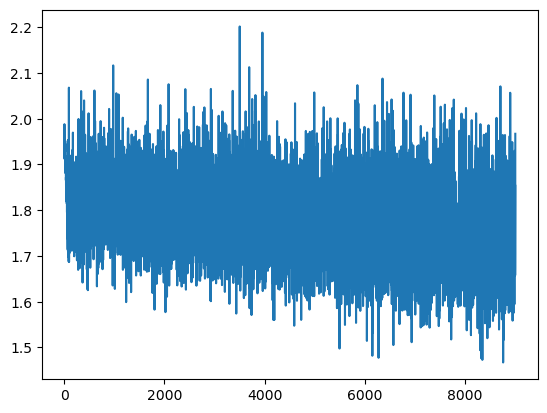

Finished Training


In [13]:
train_net(10)

In [14]:
torch.save(net.state_dict(),'trained_model_initial.pth')

In [15]:
# Loading the trained network
net.load_state_dict(torch.load('trained_model_initial.pth'))

<All keys matched successfully>

In [22]:
correct = 0
total = 0

with torch.no_grad():
    for data in tests:
        images, labels = data
        images = images.to(device)  # Move the input data to the GPU
        labels = labels.to(device)  # Move labels to the GPU

        outputs = net(images)  # Ensure the model is still on the GPU
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (len(tests),
    100 * correct / total))


Accuracy of the network on the 221 test images: 28 %
